In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import scipy
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from scipy import optimize
import os
plt.rcParams["font.family"] = "Arial"

In [5]:
# din a4: 8.26 x 11.69
current_working_directory = os.getcwd()
path_to_plots = current_working_directory+"/figs/"
path_to_parameters = current_working_directory+"/parameters/"
path_to_results = current_working_directory+"/results/"
x_page = 8
y_page = 11

# Functions

In [57]:
# edge existence probability
lambda_plus = 0.4
lambda_minus = 1
c1 = lambda_plus/(lambda_plus+ lambda_minus)
print(c1)

def r_1_func(t):
    #return((np.cos(t)+2)/10)
    return(-c1 * np.exp(- (lambda_plus + lambda_minus) * (t)) + c1)

def r_1_func_plus(t):
    #return((np.cos(t)+2)/10)
    return((1-c1) * np.exp(- (lambda_plus + lambda_minus) * (t)) + c1)

def time_series(file, counter, cols):
    # return per time step
    # mean
    # var
    # min 
    # max
    var_vec = np.zeros((counter, len(cols)))
    min_vec = np.zeros((counter, len(cols)))
    max_vec = np.zeros((counter, len(cols)))
    mean_vec = np.zeros((counter, len(cols)))
    
    file = pd.read_csv(file)
    
    for i in range(counter):
        k = 0
        for col in cols:
            mean_vec[i, k] = np.mean(file[col+str(i)])
            var_vec[i, k] = np.var(file[col+str(i)])
            min_vec[i, k] = np.min(file[col+str(i)])
            max_vec[i, k] = np.max(file[col+str(i)])
            k += 1
    
    return(mean_vec, var_vec, min_vec, max_vec)

def get_pdf(file, col):
    data = pd.read_csv(file)
    res = {}
    for i in range(len(col)):
        column = col[i]
        unique, counts = np.unique(data[column], return_counts=True)
        counts = counts/np.sum(counts)
        res[column] = [unique, counts]
    return(res)


def f(x, unique, counts):
    #unique, counts = np.unique(mu, return_counts=True)
    N = len(unique)
    A = np.zeros((N,N))
    B = np.zeros((N,N))
    for i in range(N):
        A[i,:] = counts
        A[i,i] -= 1
        for j in range(i,N):
            B[i,j] = 1- np.exp(-x[i]*x[j])
            B[j,i] = 1- np.exp(-x[i]*x[j])
    return(np.sum(np.multiply(A,B), axis = 1) - unique)

def get_rates(mu):
    unique, counts = np.unique(mu, return_counts=True)
    guess = np.ones(len(unique))
    sol = optimize.root(f, guess, args = (unique, counts), method='hybr')
    r = sol.x
    print(f(r, unique,counts))
    res_dict = {}
    
    for i in range(len(unique)):
        res_dict[unique[i]] = r[i]
    
    lambda_vec = np.zeros(len(mu))
    for i in range(len(mu)):
        lambda_vec[i] = res_dict[mu[i]]
    
    
    return(lambda_vec)



0.28571428571428575


# Edge existence probability

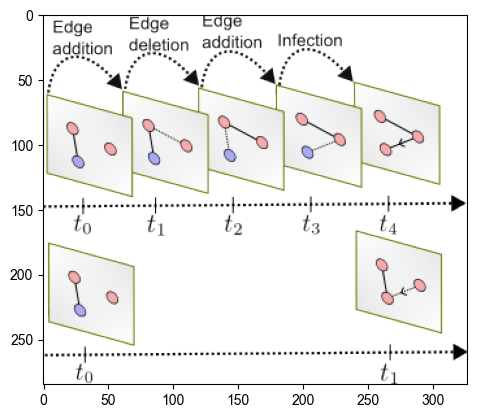

In [7]:
import matplotlib.image as image

unconnected_inf = image.imread(path_to_plots+"import_figs/unconnected_inf.png")
connected_inf = image.imread(path_to_plots+"import_figs/connected_inf.png")
ssa_vs_has = image.imread(path_to_plots+"import_figs/has_vs_ssa.png")
plt.imshow(ssa_vs_has)
plt.show()

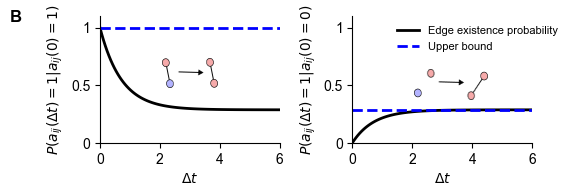

In [9]:
from matplotlib.offsetbox import (OffsetImage, AnnotationBbox)
imagebox = OffsetImage(unconnected_inf, zoom = 0.7)
ab_un = AnnotationBbox(imagebox, (3.3,0.5), frameon = False)
imagebox = OffsetImage(connected_inf, zoom = 0.7)
ab = AnnotationBbox(imagebox, (3,0.6), frameon = False)
name = "/overview/"
t = np.linspace(0,6,101)

fig1 = plt.figure(figsize=[5.2,2])
ax = fig1.add_subplot(1,2,1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


y = r_1_func_plus(t)
ax.plot(t,y, linewidth = 2, color = "black")
ax.set_ylim((0,1.1))
ax.set_xlim((0,6))
ax.set_xlabel(r'$\Delta t$')
ax.set_ylabel(r'$P(a_{ij}(\Delta t) = 1 | a_{ij}(0) = 1)$')
ax.set_yticks([0, 0.5, 1], [0,0.5,1])
ax.axhline(1, color = "blue", linestyle ='dashed', linewidth = 2)

# print unconnected prop
y = r_1_func(t)
ax2 = fig1.add_subplot(1,2,2)
ax2.plot(t,y, linewidth = 2, color = "black", label = "Edge existence probability")
ax2.set_ylim((0,1.1))
ax2.set_xlim((0,6))
ax2.set_xlabel(r'$\Delta t$')
ax2.set_ylabel(r'$P(a_{ij}(\Delta t) = 1 | a_{ij}(0) = 0)$')
ax2.set_yticks([0, 0.5, 1], [0,0.5,1])
ax2.axhline(c1, color = "blue", linestyle ='dashed', linewidth = 2, label = "Upper bound")
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

fig1.tight_layout()


ax.text(-0.5,1.05,
           'B',
            transform=ax.transAxes,
            ha='left',
            va='top',
            fontweight='bold',
            fontsize=12,
            font = 'Arial',
            bbox={'facecolor':'w','edgecolor':'w','pad':0}
        )
ax2.add_artist(ab_un)
ax.add_artist(ab)

ax2.legend(ncol = 1,frameon=False, bbox_to_anchor=(1.2,1), fontsize = 8)
fig1.savefig(path_to_plots+"fig1b.svg")
fig1.savefig(path_to_plots+"fig1b.png")
plt.show()


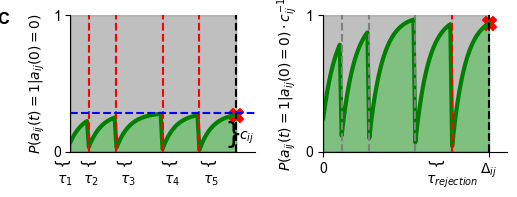

In [10]:
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'font.serif': 'Arial'})
plt.rcParams['svg.fonttype'] = 'none'

name = "/overview/"
t = np.linspace(0,10,101)
fig2, (ax1, ax2) = plt.subplots(1,2, figsize = [5.2, 2])

time_points = [-0.1,1, 2.5, 5, 7]

y = np.zeros(101)
y2 = np.zeros(101)
x = 0
for i in range(0,101):
    x += 10/101
    
    index = np.searchsorted(time_points, x, side = "left")
    y[i] = r_1_func(x - time_points[index-1])
    if x < 7:
        y2[i] = r_1_func(x)
    else:
        y2[i] = r_1_func(x-7)
        
y[91:101] = np.nan   
y2[91:101] = np.nan
ax1.plot(t,y, linewidth = 3, color = "green")
ax1.fill_between(t,y, np.ones(101), color = "grey", alpha = 0.5)
ax1.fill_between(t,y, np.zeros(101), color = "green", alpha = 0.5)
for i in range(len(time_points)):
    ax1.axvline(time_points[i], color = "red", linestyle='dashed')
ax1.axvline(9, color = "black", linestyle='dashed')
ax1.set_ylim((0,1))
ax1.set_xlim((0,10))
ax1.axhline(c1, color = "blue", linestyle = "dashed")



ax2.plot(t,y/c1, linewidth = 3, color = "green")
ax2.fill_between(t,y/c1, np.ones(101), color = "grey", alpha = 0.5)
ax2.fill_between(t,y/c1, np.zeros(101), color = "green", alpha = 0.5)
for i in range(len(time_points)):
    if time_points[i] == 7:
        ax2.axvline(time_points[i], color = "red", linestyle='dashed')
    else:
        ax2.axvline(time_points[i], color = "grey", linestyle='dashed')
ax2.axvline(9, color = "black", linestyle='dashed')
ax2.set_ylim((0,1))
ax2.set_xlim((0,10))


ax1.set_yticks([0,1],[0,1])
ax2.set_yticks([0,1],[0,1])
ax2.set_xticks([0,9])
ax2.set_xticklabels([0, r'$\Delta_{ij}$'])
ax1.set_xticks([])

ax1.annotate(r"$\}$",fontsize=11,
            xy=(0.1, 0.18), xycoords='figure fraction',rotation = -90
            )
ax1.annotate(r"$\tau_1$",fontsize=10,
            xy=(0.11, 0.07), xycoords='figure fraction'
            )

ax1.annotate(r"$\}$",fontsize=11,
            xy=(0.15, 0.18), xycoords='figure fraction',rotation = -90
            )
ax1.annotate(r"$\tau_2$",fontsize=10,
            xy=(0.16, 0.07), xycoords='figure fraction'
            )

ax1.annotate(r"$\}$",fontsize=11,
            xy=(0.22, 0.18), xycoords='figure fraction',rotation = -90
            )
ax1.annotate(r"$\tau_3$",fontsize=10,
            xy=(0.23, 0.07), xycoords='figure fraction'
            )

ax1.annotate(r"$\}$",fontsize=11,
            xy=(0.305, 0.18), xycoords='figure fraction',rotation = -90
            )
ax1.annotate(r"$\tau_4$",fontsize=10,
            xy=(0.315, 0.07), xycoords='figure fraction'
            )

ax1.annotate(r"$\}$",fontsize=11,
            xy=(0.38, 0.18), xycoords='figure fraction',rotation = -90
            )
ax1.annotate(r"$\tau_5$",fontsize=10,
            xy=(0.39, 0.07), xycoords='figure fraction'
            )


ax1.annotate(r"$\}$",fontsize=20,
            xy=(0.431, 0.27), xycoords='figure fraction'
            )
ax1.annotate(r"$c_{ij}$",fontsize=10,
            xy=(0.46, 0.29), xycoords='figure fraction'
            )


ax2.annotate(r"$\}$",fontsize=11,
            xy=(0.82, 0.18), xycoords='figure fraction',rotation = -90
            )
ax2.annotate(r"$\tau_{rejection}$",fontsize=10,
            xy=(0.82, 0.07), xycoords='figure fraction'
            )


ax1.set_ylabel(r'$P(a_{ij}(t) = 1 | a_{ij}(0) = 0)$', size = 10)
ax2.set_ylabel(r'$P(a_{ij}(t) = 1 | a_{ij}(0) = 0)\cdot c_{ij}^{-1}$', size = 10)


ax2.set_ylim((0,1))
ax2.set_xlim((0,10))

ax1.scatter(t[90], y[90], marker = "X", color = "red", s = 100)
ax2.scatter(t[90], y[90]/c1, marker = "X", color = "red", s = 100)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

fig2.tight_layout()

ax1.text(-0.4,1.0,
           'C',
            transform=ax.transAxes,
            ha='left',
            va='top',
            fontweight='bold',
            fontsize=12,
            font = 'Arial',
            bbox={'facecolor':'w','edgecolor':'w','pad':0}
        )

fig2.savefig(path_to_plots+"fig1c.svg")
fig2.savefig(path_to_plots+"fig1c.png")
plt.show()



# SSA vs HAS accuracy example: HIV-like

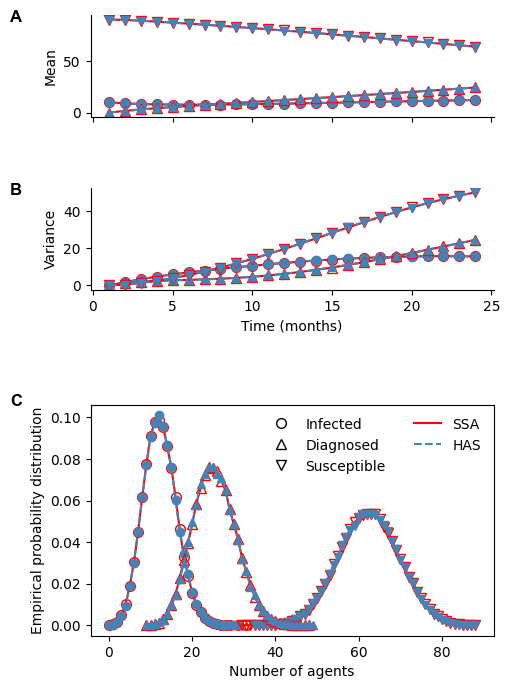

In [29]:
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'font.serif': 'Arial'})
plt.rcParams['svg.fonttype'] = 'none'

markersize = 7

cols = ["I", "D", "S"]
counter = 24
case = "HIV_like"

file = "results/"+case+"/has_result_extended_100_100000_24.csv"
mean_vec1, var_vec1, min_vec1, max_vec1 = time_series(file, counter, cols)

file = "results/"+case+"/ssa_result_extended_100_100000_24.csv"
mean_vec2, var_vec2, min_vec2, max_vec2 = time_series(file, counter, cols)


fig = plt.figure(figsize = [5.2, 7])
t = np.linspace(1,counter,  counter)
ax = fig.add_subplot(4,1,1)
ax.text(-0.2,1.05,
           'A',
            transform=ax.transAxes,
            ha='left',
            va='top',
            fontweight='bold',
            fontsize=12,
            font = 'Arial',
            bbox={'facecolor':'w','edgecolor':'w','pad':0}
        )
ax.plot(t,mean_vec2[:,0], marker = "o", color = "red",markersize=markersize,mfc = 'none',)
ax.plot(t,mean_vec1[:,0], marker = "o", color = "steelblue",markersize=markersize-1, linestyle = 'dashed')
ax.plot(t,mean_vec2[:,1], marker = "^", color = "red",markersize=markersize,mfc = 'none',)
ax.plot(t,mean_vec1[:,1], marker = "^", color = "steelblue",markersize=markersize-1, linestyle = 'dashed')
ax.plot(t,mean_vec2[:,2], marker = "v", color = "red",markersize=markersize,mfc = 'none',)
ax.plot(t,mean_vec1[:,2], marker = "v", color = "steelblue",markersize=markersize-1, linestyle = 'dashed')
ax.set_ylabel("Mean")
ax.set_xticklabels([])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax = fig.add_subplot(4,1,2)
ax.text(-0.2,1.05,
           'B',
            transform=ax.transAxes,
            ha='left',
            va='top',
            fontweight='bold',
            fontsize=12,
            font = 'Arial',
            bbox={'facecolor':'w','edgecolor':'w','pad':0}
        )
ax.plot(t,var_vec2[:,0], marker = "o", color = "red",markersize=markersize,mfc = 'none')
ax.plot(t,var_vec1[:,0], marker = "o", color = "steelblue",markersize=markersize-1, linestyle = 'dashed')
ax.plot(t,var_vec2[:,1], marker = "^", color = "red",markersize=markersize,mfc = 'none')
ax.plot(t,var_vec1[:,1], marker = "^", color = "steelblue",markersize=markersize-1, linestyle = 'dashed')
ax.plot(t,var_vec2[:,2], marker = "v", color = "red",markersize=markersize,mfc = 'none')
ax.plot(t,var_vec1[:,2], marker = "v", color = "steelblue",markersize=markersize-1, linestyle = 'dashed')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel("Time (months)")
ax.set_ylabel("Variance")


# panel c
col = ["I", "D", "S"]
case = "HIV_like"

ssa_cy = "results/"+case+"/ssa_result_100_100000_24.csv"
has_cy = "results/"+case+"/has_result_100_100000_24.csv"
res_has = get_pdf(has_cy, col)
res_ssa = get_pdf(ssa_cy, col)

lw = 2
fs = 18

ax = fig.add_subplot(2,1,2)
ax.text(-0.2,1.05,
           'C',
            transform=ax.transAxes,
            ha='left',
            va='top',
            fontweight='bold',
            fontsize=12,
            font = 'Arial',
            bbox={'facecolor':'w','edgecolor':'w','pad':0}
        )


ax.plot(res_ssa["I"][0], res_ssa["I"][1], color = "red", label = "SSA", marker = 'o', markersize = markersize, mfc = 'none')
ax.plot(res_has["I"][0], res_has["I"][1], color = "steelblue", label = "HAS", linestyle='dashed', marker = 'o', markersize = markersize-1)

ax.plot(res_ssa["S"][0], res_ssa["S"][1], color = "red",  marker = 'v', markersize = markersize, mfc = 'none')
ax.plot(res_has["S"][0], res_has["S"][1], color = "steelblue", linestyle='dashed', marker = 'v', markersize = markersize-1)

ax.plot(res_ssa["D"][0], res_ssa["D"][1], color = "red",  marker = '^', markersize = markersize, mfc = 'none')
ax.plot(res_has["D"][0], res_has["D"][1], color = "steelblue", linestyle='dashed', marker = '^', markersize = markersize-1)


ax.set_xlabel("Number of agents")
ax.set_ylabel("Empirical probability distribution")

# create manual symbols for legend  
line_ssa = Line2D([0], [0], label='SSA', color='red')
line_has = Line2D([0], [0], label='HAS', color='steelblue', linestyle = 'dashed')
point_I = Line2D([0], [0], label='Infected', marker='o', markersize= markersize,mfc = 'none', linestyle='', color='k')
point_D = Line2D([0], [0], label='Diagnosed', marker='^', markersize= markersize,mfc = 'none', linestyle='', color='k')
point_S = Line2D([0], [0], label='Susceptible', marker='v', markersize= markersize,mfc = 'none', linestyle='', color='k')

# add manual symbols to auto legend
handles = [point_I, point_D, point_S, line_ssa, line_has, ]
ax.legend(handles=handles, ncol = 2,frameon=False, fontsize = 10)

fig.tight_layout()
fig.savefig(path_to_plots+"fig2.svg")
plt.show()
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

# Run time comparison 

[0.09090909090909091, 0.3333333333333333, 0.5, 0.8333333333333334, 0.9090909090909091, 0.9803921568627451, 0.9900990099009901]


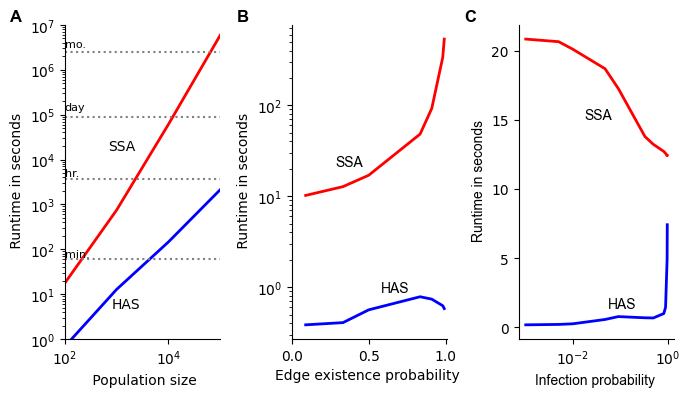

In [25]:
#fig, ax = plt.subplots(1,3,figsize = [x_page,y_page/2])
fig, ax = plt.subplots(1,3,figsize = [7,4])
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'font.serif': 'Arial'})
plt.rcParams['svg.fonttype'] = 'none'
k = 0
letter = "ABC"

# panel A
N = [100, 1000, 10000, 100000]

has = []
ssa = []

lw = 2
for n in N:
    data = "results/speed/large_n/has_run_time_"+str(n)+".txt"
    f = open(data, "r")
    has.append(float(f.read()))
    
    data = "results/speed/large_n/ssa_run_time_"+str(n)+".txt"
    f = open(data, "r")
    ssa.append(float(f.read()))
    
ax[0].plot(N, has, linewidth = lw, color = "blue")
ax[0].plot(N, ssa, linewidth = lw, color = "red")

ax[0].axhline(60, linestyle = "dotted", color = "grey")
ax[0].axhline(60*60, linestyle = "dotted", color = "grey")
ax[0].axhline(60*60*24, linestyle = "dotted", color = "grey")
ax[0].axhline(60*60*24*28, linestyle = "dotted", color = "grey")

ax[0].axis([100, 100000, 1, 10000000])
ax[0].annotate('SSA',
            xy=(0.28, 0.6),xycoords='axes fraction')

ax[0].annotate('HAS',
            xy=(0.3, 0.1),xycoords='axes fraction')

ax[0].annotate('min.',xy=(0, 0.26),xycoords='axes fraction', fontsize = 8)
ax[0].annotate('hr.',xy=(0, 0.52),xycoords='axes fraction', fontsize = 8)
ax[0].annotate('day',xy=(0, 0.73),xycoords='axes fraction', fontsize = 8)
ax[0].annotate('mo.',xy=(0, 0.93),xycoords='axes fraction', fontsize = 8)

ax[0].loglog()
ax[0].set_xlabel(" Population size")
ax[0].set_ylabel(" Runtime in seconds")



# panel B
loops = [0.1, 0.5, 1, 5, 10, 50, 100]
has = []
ssa = []
x = []
for n in loops:
    data = "results/speed/lambda_plus/lambda"+str(n)+"/has_run_time_100.txt"
    f = open(data, "r")
    has.append(float(f.read()))
    
    data = "results/speed/lambda_plus/lambda"+str(n)+"/ssa_run_time_100.txt"
    f = open(data, "r")
    ssa.append(float(f.read()))
    
    x.append(n/(1+n))
    
print(x)

ax[1].plot(x, has, linewidth = 2, color = "blue")
ax[1].plot(x, ssa, linewidth = 2, color = "red")
ax[1].set_yscale('log')
ax[1].set_xlim(0,1.01)

ax[1].annotate('SSA',
            xy=(0.28, 0.55),xycoords='axes fraction',font='Arial',
            fontsize=10)


ax[1].annotate('HAS',
            xy=(0.57, 0.15),xycoords='axes fraction',font='Arial',
            fontsize=10)   

ax[1].set_xlabel("Edge existence probability ")
ax[1].set_ylabel(" Runtime in seconds")

# panel C
loops = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1,5,10,50, 80]
has = []
ssa = []
x = []
for n in loops:
    data = "results/speed/r_inf/inf"+str(n)+"/has_run_time_100.txt"
    f = open(data, "r")
    has.append(float(f.read()))
    
    data = "results/speed/r_inf/inf"+str(n)+"/ssa_run_time_100.txt"
    f = open(data, "r")
    ssa.append(float(f.read()))
    
    x.append(n/(1+n))
    
ax[2].plot(x, has, linewidth = 2, color = "blue")
ax[2].plot(x, ssa, linewidth = 2, color = "red")
ax[2].set_xscale('log')

ax[2].annotate('SSA',
            xy=(0.42, 0.7),xycoords='axes fraction',font='Arial',
            fontsize=10)
ax[2].annotate('HAS',
            xy=(0.57, 0.1),xycoords='axes fraction',font='Arial',
            fontsize=10)   

ax[2].set_xlabel("Infection probability ", fontsize = 10,font='Arial')
ax[2].set_ylabel(" Runtime in seconds", fontsize = 10,font='Arial')

fig.tight_layout()

for ax_tmp in ax:
    ax_tmp.spines['top'].set_visible(False)
    ax_tmp.spines['right'].set_visible(False)

    ax_tmp.text(-0.35,1.05,
           letter[k],
            transform=ax_tmp.transAxes,
            ha='left',
            va='top',
            fontweight='bold',
            fontsize=12,
            font = 'Arial',
            bbox={'facecolor':'w','edgecolor':'w','pad':0}
        )
    k+=1
plt.show()
fig.savefig(path_to_plots+"fig3.svg")
fig.savefig(path_to_plots+"fig3.png", dpi = 300)

matplotlib.rcParams.update(matplotlib.rcParamsDefault)

# Population wide measures

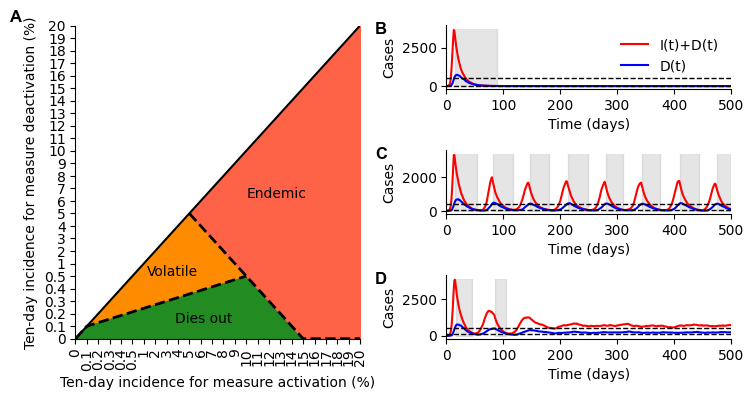

In [34]:
cm_range = [0,0.1, 0.2, 0.3, 0.4, 0.5, 1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
cm_real = [0,5,10,15,20,25,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]
fig = plt.figure(figsize = [7.5,4])
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'font.serif': 'Arial'})
plt.rcParams['svg.fonttype'] = 'none'

cols = ["I", "D"]
counter = 1000
xlim = 500
N = 10000
sims = 1
t = np.linspace(1,counter,  counter)

ax= fig.add_subplot(1,2,1)
ax2= fig.add_subplot(3,2,2)
ax3= fig.add_subplot(3,2,4)
ax4= fig.add_subplot(3,2,6)
dummy = [x for x in range(len(cm_range))]
ax.plot(dummy, dummy, color = "black")

d_min_real = [0,5,5,10,10,15,15,15,15,15,15,20,20,25,25,25,20,15,10,5,0,0,0,0,0,0]



d_min_dummy = [cm_real.index(x) for x in d_min_real]

d_dummy = [0,1,5]
d_dummy_x = [0,1,15]

e_real = [float("nan"),float("nan"),float("nan"),float("nan"),float("nan"),float("nan"),float("nan"),float("nan"),float("nan"),float("nan"),250, 200,150,100,50,25,20,15,10,5,0,0,0,0,0,0]
e_dummy = [float("nan") if np.isnan(x) else cm_real.index(x) for x in e_real]


ax.fill_between(d_dummy_x, d_dummy_x, d_dummy, color = "darkorange")
ax.fill_between(d_dummy_x, d_dummy, color = "forestgreen")
ax.fill_between(dummy[15:21], e_dummy[15:21], color = "forestgreen")
ax.fill_between(dummy, dummy, e_dummy , color = "tomato", alpha = 1)
ax.plot(e_dummy, color = "black", linewidth = 2, linestyle = "dashed")
ax.plot(d_dummy_x, d_dummy, color = "black", linewidth = 2, linestyle = "dashed")

ax.set_xticks(dummy, cm_range, rotation=90)
ax.set_yticks(dummy, cm_range)

ax.set_xlabel("Ten-day incidence for measure activation (%)")
ax.set_ylabel("Ten-day incidence for measure deactivation (%)")

ax.annotate("Volatile", xy = (0.25,0.2), xycoords='axes fraction')
ax.annotate("Dies out", xy = (0.35,0.05), xycoords='axes fraction')
ax.annotate("Endemic", xy = (0.6,0.45), xycoords='axes fraction')

#########################################################################################################
# dies out
cm = 500
cm_off = 5
case = "phase_transition/cm_"+str(cm)+"/cm_off_"+str(cm_off)
file = "results/"+case+"/has_feat_result_extended_"+str(N)+"_"+str(sims)+"_"+str(counter)+".csv"
mean_vec1, var_vec1, min_vec1, max_vec1 = time_series(file, counter, cols)


ax2.plot(t,mean_vec1[:,0]+mean_vec1[:,1], color = "red",markersize=10,mfc = 'none', label = "I(t)+D(t)")
ax2.plot(t,mean_vec1[:,1], color = "blue",markersize=10,mfc = 'none',label = "D(t)")

handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles=handles, ncol = 1,frameon=False, loc = "upper right")#, fontsize = fs)

measure_active = False
days = np.zeros(len(t))
for k in range(xlim):
    if measure_active:
        if mean_vec1[k,1] <= cm_off:
            measure_active = False
        else:
            days[k] = max(mean_vec1[:,0]+mean_vec1[:,1]) +100
    else:
        if mean_vec1[k,1] >= cm:
            measure_active = True
days[days == 0] = float('NaN')              
ax2.plot(t,days, color = 'white')#, linewidth = 4)

ax2.fill_between(t, days, alpha = 0.2, color = 'grey')
ax2.axhline(cm, linestyle = "dashed", color = 'black', linewidth = 1)
ax2.axhline(cm_off, linestyle = "dashed", color = 'black', linewidth = 1)
ax2.set_xlim(0,xlim)



#########################################################################################################
# volatile
cm = 400
cm_off = 50
case = "phase_transition/cm_"+str(cm)+"/cm_off_"+str(cm_off)
file = "results/"+case+"/has_feat_result_extended_"+str(N)+"_"+str(sims)+"_"+str(counter)+".csv"
mean_vec1, var_vec1, min_vec1, max_vec1 = time_series(file, counter, cols)


ax3.plot(t,mean_vec1[:,0]+mean_vec1[:,1], color = "red",markersize=10,mfc = 'none', label = "I(t)+D(t)")
ax3.plot(t,mean_vec1[:,1], color = "blue",markersize=10,mfc = 'none',label = "D(t)")

handles, labels = ax3.get_legend_handles_labels()

measure_active = False
days = np.zeros(len(t))
for k in range(xlim):
    if measure_active:
        if mean_vec1[k,1] <= cm_off:
            measure_active = False
        else:
            days[k] = max(mean_vec1[:,0]+mean_vec1[:,1]) +100
    else:
        if mean_vec1[k,1] >= cm:
            measure_active = True
days[days == 0] = float('NaN')              
ax3.plot(t,days, color = 'white')#, linewidth = 4)

ax3.fill_between(t, days, alpha = 0.2, color = 'grey')
ax3.axhline(cm, linestyle = "dashed", color = 'black', linewidth = 1)
ax3.axhline(cm_off, linestyle = "dashed", color = 'black', linewidth = 1)
ax3.set_xlim(0,xlim)

#########################################################################################################
# endemic
cm = 500
cm_off = 150
case = "phase_transition/cm_"+str(cm)+"/cm_off_"+str(cm_off)
file = "results/"+case+"/has_feat_result_extended_"+str(N)+"_"+str(sims)+"_"+str(counter)+".csv"
mean_vec1, var_vec1, min_vec1, max_vec1 = time_series(file, counter, cols)


ax4.plot(t,mean_vec1[:,0]+mean_vec1[:,1], color = "red",markersize=10,mfc = 'none', label = "I(t)+D(t)")
ax4.plot(t,mean_vec1[:,1], color = "blue",markersize=10,mfc = 'none',label = "D(t)")

handles, labels = ax3.get_legend_handles_labels()

measure_active = False
days = np.zeros(len(t))
for k in range(xlim):
    if measure_active:
        if mean_vec1[k,1] <= cm_off:
            measure_active = False
        else:
            days[k] = max(mean_vec1[:,0]+mean_vec1[:,1]) +100
    else:
        if mean_vec1[k,1] >= cm:
            measure_active = True
days[days == 0] = float('NaN')              
ax4.plot(t,days, color = 'white')#, linewidth = 4)

ax4.fill_between(t, days, alpha = 0.2, color = 'grey')
ax4.axhline(cm, linestyle = "dashed", color = 'black', linewidth = 1)
ax4.axhline(cm_off, linestyle = "dashed", color = 'black', linewidth = 1)
ax4.set_xlim(0,xlim)

ax2.set_xlabel("Time (days)")
ax3.set_xlabel("Time (days)")
ax4.set_xlabel("Time (days)")
ax2.set_ylabel("Cases")
ax3.set_ylabel("Cases")
ax4.set_ylabel("Cases")

ax.set_xlim(0,25)
ax.set_ylim(0,25)
fig.tight_layout()

letter = "ABCD"
k= 0
for ax_tmp in [ax, ax2, ax3, ax4]:
    ax_tmp.spines['top'].set_visible(False)
    ax_tmp.spines['right'].set_visible(False)

    if k == 0:
        x = -0.23
    else:
        x = -0.25
    ax_tmp.text(x,1.05,
           letter[k],
            transform=ax_tmp.transAxes,
            ha='left',
            va='top',
            fontweight='bold',
            fontsize=12,
            font = 'Arial',
            bbox={'facecolor':'w','edgecolor':'w','pad':0}
        )
    k+=1


plt.show()


fig.savefig(path_to_plots+"fig5.svg")
fig.savefig(path_to_plots+"fig5.png", dpi = 300)
matplotlib.rcParams.update(matplotlib.rcParamsDefault)



# Spontaneous transient contact changes

In [618]:
def f(x, unique, counts):
    #unique, counts = np.unique(mu, return_counts=True)
    N = len(unique)
    A = np.zeros((N,N))
    B = np.zeros((N,N))
    for i in range(N):
        A[i,:] = counts
        A[i,i] -= 1
        for j in range(i,N):
            B[i,j] = 1- np.exp(-x[i]*x[j])
            B[j,i] = 1- np.exp(-x[i]*x[j])
    return(np.sum(np.multiply(A,B), axis = 1) - unique)

def get_rates(mu):
    unique, counts = np.unique(mu, return_counts=True)
    guess = np.ones(len(unique))
    sol = optimize.root(f, guess, args = (unique, counts), method='hybr')
    r = sol.x
    print(f(r, unique,counts))
    res_dict = {}
    
    for i in range(len(unique)):
        res_dict[unique[i]] = r[i]
    
    lambda_vec = np.zeros(len(mu))
    for i in range(len(mu)):
        lambda_vec[i] = res_dict[mu[i]]
    
    
    return(lambda_vec)

def get_degree_probabilites(lambda_plus, mu):
    unique, counts = np.unique(mu, return_counts=True)
    N = len(unique)
    print(N)
    A = np.zeros((N,N))
    B = np.zeros((N,N))
    for i in range(N):
        #A[i,:] = counts
        #A[i,i] -= 1
        for j in range(i,N):
            A[i,j] = counts[i]*counts[j]
            A[j,i] = counts[j]*counts[i]
            B[i,j] = 1- np.exp(-lambda_plus[i]*lambda_plus[j])
            B[j,i] = 1- np.exp(-lambda_plus[i]*lambda_plus[j])
    return(np.multiply(A,B))

In [42]:
np.random.seed(7)
N = 1000
mu = np.random.poisson(10, N)
mu = mu/7
lambda_plus = get_rates(mu)
Q = np.matmul(lambda_plus.reshape((len(lambda_plus), 1)),lambda_plus.reshape(1,len(lambda_plus)))
np.fill_diagonal(Q, 0)
P = 1 - np.exp(-Q)

[-1.17312271e-10 -5.61278801e-12  4.94047026e-11  6.37896402e-11
  5.17350607e-11  2.51512144e-11 -6.04560846e-12 -3.40762973e-11
 -5.33701972e-11 -6.04898354e-11 -5.41875433e-11 -3.54534180e-11
 -7.47890638e-12  2.43085552e-11  5.22470955e-11  6.63713529e-11
  5.44857492e-11  2.10764739e-12 -1.07518883e-10]


In [43]:
lambda_minus = np.ones(N)
recovery = np.ones(N)/5
measure_risk = np.ones(N)
measure_removal = np.ones(N)

In [44]:
repo = path_to_parameters+"/transient/poisson"
np.save(repo+"/mu_vec.npy", mu)
np.save(repo+"/lambda_plus.npy", lambda_plus)
np.save(repo+"/lambda_minus.npy", lambda_minus)
np.save(repo+"/recovery.npy", recovery)

In [45]:
df= pd.DataFrame(columns=['inf_prop', 'diag_prop', 'i0', 'beta_measure'])

inf_prop_all = [np.round((x+1)*0.05,2) for x in range(19)]
diag_prop_all = [0.5, 0]
i0_all = [5]
beta_measure_all = [1, 0]
sims = 100
i = 0

for inf_prop in inf_prop_all:
    for diag_prop in diag_prop_all:
        for i0 in i0_all:
            if diag_prop == 0:
                for sim in range(sims):
                    df.loc[i] = [inf_prop, diag_prop, i0, 1]
                    i += 1
            else:
                for beta_measure in beta_measure_all:
                        for sim in range(sims):
                            df.loc[i] = [inf_prop, diag_prop, i0, beta_measure]
                            i += 1

df.to_csv(repo+"/sampled_parameters.csv", index=False)

len(df)

5700

In [47]:
np.random.seed(8)
mu = 1+np.round(np.random.exponential(9,N),0)
mu = mu/7
lambda_plus = get_rates(mu)
plt.hist(mu, bins = 40)
repo = path_to_parameters+"transient/exponential"
np.save(repo+"/mu_vec.npy", mu)
np.save(repo+"/lambda_plus.npy", lambda_plus)
np.save(repo+"/lambda_minus.npy", lambda_minus)
np.save(repo+"/recovery.npy", recovery)
df.to_csv(repo+"/sampled_parameters.csv", index=False)

[ 5.20113452e-10  1.83408622e-10 -6.39587827e-11 -2.34547382e-10
 -3.39963058e-10 -3.90989130e-10 -3.97428090e-10 -3.68313380e-10
 -3.11875414e-10 -2.35512720e-10 -1.45820467e-10 -4.87401230e-11
  5.05759878e-11  1.47589940e-10  2.38530085e-10  3.20137694e-10
  3.89843269e-10  4.45558701e-10  4.85796292e-10  5.09563503e-10
  5.16342968e-10  5.06073849e-10  4.79150497e-10  3.78484355e-10
  3.07249781e-10  2.24271712e-10  1.31463729e-10  3.10933501e-11
 -7.45457029e-11 -1.82862614e-10 -2.91194624e-10 -3.96817690e-10
 -4.96839903e-10 -5.88419979e-10 -6.68704203e-10 -7.34847738e-10
 -7.84030618e-10 -8.13617618e-10 -8.03877853e-10 -7.59855290e-10
 -6.87071733e-10 -2.79273493e-10 -7.62563346e-11  1.61478830e-10
  1.45586654e-09  2.29431496e-09 -2.63900901e-10]


In [48]:
np.random.seed(7)
mu = np.random.randint(1,20,N)
mu = mu/7
lambda_plus = get_rates(mu)
repo = path_to_parameters+"/transient/uniform"
np.save(repo+"/mu_vec.npy", mu)
np.save(repo+"/lambda_plus.npy", lambda_plus)
np.save(repo+"/lambda_minus.npy", lambda_minus)
np.save(repo+"/recovery.npy", recovery)
df.to_csv(repo+"/sampled_parameters.csv", index=False)

[-2.70844180e-10  3.13350013e-10  4.75798789e-10  3.66179531e-10
  1.11422316e-10 -1.84255611e-10 -4.39543513e-10 -5.95906435e-10
 -6.17943252e-10 -4.93187713e-10 -2.32228681e-10  1.31275213e-10
  5.40505418e-10  9.15594711e-10  1.15372289e-09  1.12889698e-09
  6.92242264e-10 -3.27957217e-10 -2.12655626e-09]


In [49]:
df= pd.DataFrame(columns=['inf_prop', 'diag_prop', 'i0', 'beta_measure'])

inf_prop_all = [0.55]
diag_prop_all = [0.5]
i0_all = [5]
beta_measure_all = [1, 0]#[np.round((x)*0.05,2) for x in range(20)]
sims = 100

i = 0

for inf_prop in inf_prop_all:
    for diag_prop in diag_prop_all:
        for i0 in i0_all:
            for beta_measure in beta_measure_all:
                for sim in range(sims):
                    df.loc[i] = [inf_prop, diag_prop, i0, beta_measure]
                    i += 1

print(df)
df.to_csv(path_to_parameters+"transient/poisson/sampled_parameters.csv", index=False)
df.to_csv(path_to_parameters+"transient/uniform/sampled_parameters.csv", index=False)
df.to_csv(path_to_parameters+"transient/exponential/sampled_parameters.csv", index=False)

len(df)

     inf_prop  diag_prop   i0  beta_measure
0        0.55        0.5  5.0           1.0
1        0.55        0.5  5.0           1.0
2        0.55        0.5  5.0           1.0
3        0.55        0.5  5.0           1.0
4        0.55        0.5  5.0           1.0
..        ...        ...  ...           ...
195      0.55        0.5  5.0           0.0
196      0.55        0.5  5.0           0.0
197      0.55        0.5  5.0           0.0
198      0.55        0.5  5.0           0.0
199      0.55        0.5  5.0           0.0

[200 rows x 4 columns]


200

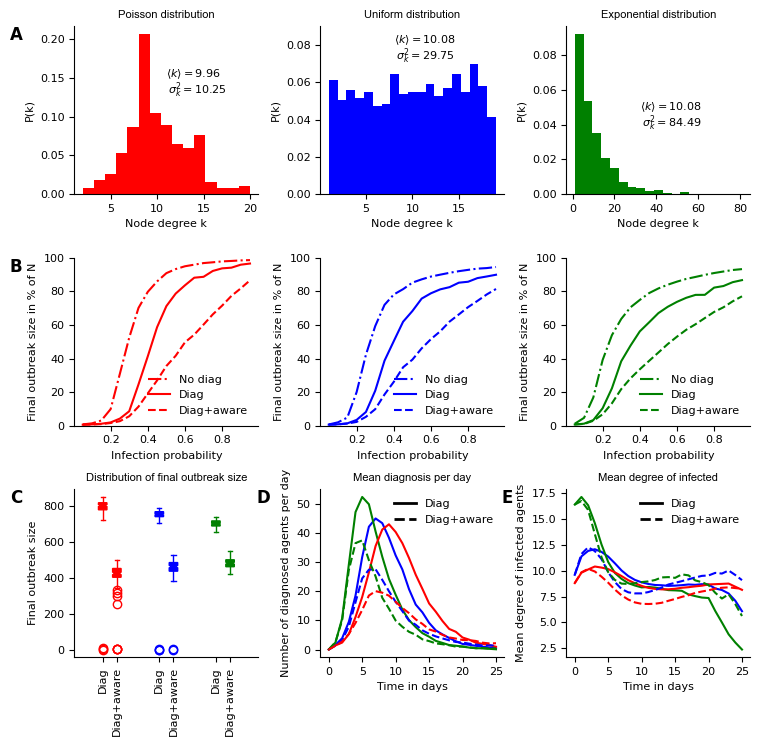

In [56]:
plt.rcParams.update({'font.size': 8})
plt.rcParams.update({'font.serif': 'Arial'})
plt.rcParams['svg.fonttype'] = 'none'



fig, ax = plt.subplots(3,3, figsize = [7.5, 7.5])

for i in range(3):
    for j in range(3):
        ax[i,j].spines['top'].set_visible(False)
        ax[i,j].spines['right'].set_visible(False)

len_df = 200
repo_res = path_to_results+"/transient/uniform"
data_D_uniform = pd.read_csv(repo_res + "/has_result_D_cum_0_"+str(len_df)+".csv")
data_R_uniform = pd.read_csv(repo_res + "/has_result_R_0_"+str(len_df)+".csv")
data_lambda_uniform = pd.read_csv(repo_res + "/has_result_lambda_0_"+str(len_df)+".csv")
data_mean_degree_I_uniform = pd.read_csv(repo_res + "/has_result_mean_degree_I_0_"+str(len_df)+".csv")
repo_res = path_to_results+"/transient/exponential"
data_D_exp = pd.read_csv(repo_res + "/has_result_D_cum_0_"+str(len_df)+".csv")
data_R_exp = pd.read_csv(repo_res + "/has_result_R_0_"+str(len_df)+".csv")
data_lambda_exp = pd.read_csv(repo_res + "/has_result_lambda_0_"+str(len_df)+".csv")
data_mean_degree_I_exp = pd.read_csv(repo_res + "/has_result_mean_degree_I_0_"+str(len_df)+".csv")
repo_res = path_to_results+"/transient/poisson"
data_D_pois = pd.read_csv(repo_res + "/has_result_D_cum_0_"+str(len_df)+".csv")
data_R_pois = pd.read_csv(repo_res + "/has_result_R_0_"+str(len_df)+".csv")
data_lambda_pois = pd.read_csv(repo_res + "/has_result_lambda_0_"+str(len_df)+".csv")
data_mean_degree_I_pois = pd.read_csv(repo_res + "/has_result_mean_degree_I_0_"+str(len_df)+".csv")

# histogram pois
ax[0,0].set_title("Poisson distribution", size = 10, font = "Arial")
np.random.seed(7)
N = 1000
mu = np.random.poisson(10, N)

ax[0,0].hist(mu, bins = 15, color = "red", density = True)
ax[0,0].set_xlabel("Node degree k")
ax[0,0].set_ylabel("P(k)")

ax[0,0].annotate(r'$\langle k \rangle=$'+str((np.round(np.mean(mu), 2))), xy=(0.5,0.7), xycoords='axes fraction')
ax[0,0].annotate(r'$\sigma_k^2=$'+str((np.round(np.var(mu), 2))), xy=(0.51,0.6), xycoords='axes fraction')

# histogram uniform
ax[0,1].set_title("Uniform distribution", size = 10, font = "Arial")
np.random.seed(7)
mu = np.random.randint(1,20,N)

ax[0,1].hist(mu, bins = 19, color = "blue", density = True)
ax[0,1].set_xlabel("Node degree k")
ax[0,1].set_ylabel("P(k)")

ax[0,1].annotate(r'$\langle k \rangle=$'+str((np.round(np.mean(mu), 2))), xy=(0.4,0.9), xycoords='axes fraction')
ax[0,1].annotate(r'$\sigma_k^2=$'+str((np.round(np.var(mu), 2))), xy=(0.41,0.8), xycoords='axes fraction')

ax[0,1].set_ylim(0,0.09)


# histogram exponential
ax[0,2].set_title("Exponential distribution", size = 10, font = "Arial")
np.random.seed(8)
mu = 1+np.round(np.random.exponential(9,N),0)

ax[0,2].hist(mu, bins = 19, color = "green", density = True)
ax[0,2].set_xlabel("Node degree k")
ax[0,2].set_ylabel("P(k)")

ax[0,2].annotate(r'$\langle k \rangle=$'+str((np.round(np.mean(mu), 2))), xy=(0.4,0.5), xycoords='axes fraction')
ax[0,2].annotate(r'$\sigma_k^2=$'+str((np.round(np.var(mu), 2))), xy=(0.41,0.4), xycoords='axes fraction')
        
# diagnosed cases
ax_tmp = ax[2,1]
ax_tmp.set_title("Mean diagnosis per day", size = 10, font = "Arial")
tmp_uniform = data_D_uniform.groupby(['inf_prop', 'diag_prop', 'beta_measure']).mean().reset_index()
tmp_exp = data_D_exp.groupby(['inf_prop', 'diag_prop', 'beta_measure']).mean().reset_index()
tmp_pois = data_D_pois.groupby(['inf_prop', 'diag_prop', 'beta_measure']).mean().reset_index()

ax_tmp.plot(tmp_uniform.iloc[1][4:4+26], label = "uniform", color = "blue")
ax_tmp.plot(tmp_exp.iloc[1][4:4+26], label = "exponential", color = "green")
ax_tmp.plot(tmp_pois.iloc[1][4:4+26], label = "poisson", color = "red")

ax_tmp.plot(tmp_uniform.iloc[0][4:4+26], color = "blue", linestyle = "dashed")
ax_tmp.plot(tmp_exp.iloc[0][4:4+26], color = "green", linestyle = "dashed")
ax_tmp.plot(tmp_pois.iloc[0][4:4+26],  color = "red", linestyle = "dashed")


ax_tmp.set_xticks([0,5,10,15,20,25], [0,5,10,15,20,25])
ax_tmp.set_xlabel("Time in days")
ax_tmp.set_ylabel("Number of diagnosed agents per day")


# size of outbreak
ax_tmp = ax[2,0]
ax_tmp.set_title("Distribution of final outbreak size", fontsize = 10, font = "Arial")
data_exp_0 = data_D_exp[data_D_exp["beta_measure"] == 0]
data_exp_1 = data_D_exp[data_D_exp["beta_measure"] == 1]
data_pois_0 = data_D_pois[data_D_pois["beta_measure"] == 0]
data_pois_1 = data_D_pois[data_D_pois["beta_measure"] == 1]
data_uniform_0 = data_D_uniform[data_D_pois["beta_measure"] == 0]
data_uniform_1 = data_D_uniform[data_D_pois["beta_measure"] == 1]

c = "red"
ax_tmp.boxplot([data_pois_1["total_immunized"],data_pois_0["total_immunized"]], positions=[1,1.25], notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c),
            )

c = "blue"
ax_tmp.boxplot([data_uniform_1["total_immunized"],data_uniform_0["total_immunized"]], positions=[2,2.25], notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c),
            )

c = "green"
ax_tmp.boxplot([data_exp_1["total_immunized"],data_exp_0["total_immunized"]], positions=[3,3.25], notch=True, patch_artist=True,
            boxprops=dict(facecolor=c, color=c),
            capprops=dict(color=c),
            whiskerprops=dict(color=c),
            flierprops=dict(color=c, markeredgecolor=c),
            medianprops=dict(color=c),
            )

ax_tmp.set_xticks([1,1.25,2,2.25,3,3.25], ["Diag", "Diag+aware","Diag", "Diag+aware","Diag", "Diag+aware"], rotation = 90)
ax_tmp.set_ylabel("Final outbreak size")



# mean degree
ax_tmp = ax[2,2]
ax_tmp.set_title("Mean degree of infected", size = 10, font = "Arial")

tmp_uniform = data_mean_degree_I_uniform.groupby(['inf_prop', 'diag_prop', 'beta_measure']).mean().reset_index()
tmp_exp = data_mean_degree_I_exp.groupby(['inf_prop', 'diag_prop', 'beta_measure']).mean().reset_index()
tmp_pois = data_mean_degree_I_pois.groupby(['inf_prop', 'diag_prop', 'beta_measure']).mean().reset_index()

ax_tmp.plot(tmp_uniform.iloc[1][4:4+26]*7, label = "uniform", color = "blue")
ax_tmp.plot(tmp_exp.iloc[1][4:4+26]*7, label = "exponential", color = "green")
ax_tmp.plot(tmp_pois.iloc[1][4:4+26]*7, label = "poisson", color = "red")

ax_tmp.plot(tmp_uniform.iloc[0][4:4+26]*7, color = "blue", linestyle = "dashed")
ax_tmp.plot(tmp_exp.iloc[0][4:4+26]*7, color = "green", linestyle = "dashed")
ax_tmp.plot(tmp_pois.iloc[0][4:4+26]*7,  color = "red", linestyle = "dashed")

ax_tmp.set_xticks([0,5,10,15,20,25], [0,5,10,15,20,25])

ax_tmp.set_xlabel("Time in days")
ax_tmp.set_ylabel("Mean degree of infected agents")

ax_tmp.set_xticks([0,5,10,15,20,25], [0,5,10,15,20,25])


# middle block 
len_df = 5700
repo_res = path_to_results+"/transient/uniform"
data_D_uniform = pd.read_csv(repo_res + "/has_result_D_cum_0_"+str(len_df)+".csv")
repo_res = path_to_results+"/transient/exponential"
data_D_exp = pd.read_csv(repo_res + "/has_result_D_cum_0_"+str(len_df)+".csv")
repo_res = path_to_results+"/transient/poisson"
data_D_pois = pd.read_csv(repo_res + "/has_result_D_cum_0_"+str(len_df)+".csv")

# poisson
tmp_pois = data_D_pois.groupby(['inf_prop', 'diag_prop', 'beta_measure']).mean().reset_index()
tmp_pois_0 = tmp_pois[tmp_pois["beta_measure"] == 0]
tmp_pois_1 = tmp_pois[(tmp_pois["beta_measure"] == 1) &(tmp_pois["diag_prop"] == 0.5)]
tmp_pois_c = tmp_pois[(tmp_pois["beta_measure"] == 1) &(tmp_pois["diag_prop"] == 0)]

tmp_pois_var = data_D_pois.groupby(['inf_prop', 'diag_prop', 'beta_measure']).var().reset_index()
tmp_pois_var_0 = tmp_pois_var[tmp_pois_var["beta_measure"] == 0]
tmp_pois_var_1 = tmp_pois_var[(tmp_pois_var["beta_measure"] == 1) &(tmp_pois_var["diag_prop"] == 0.5)]
tmp_pois_var_c = tmp_pois_var[(tmp_pois_var["beta_measure"] == 1) &(tmp_pois_var["diag_prop"] == 0)]

ax[1,0].plot(tmp_pois_c["inf_prop"],tmp_pois_c["total_immunized"]/10, color = "red", linestyle = 'dashdot', label = "No diag")
ax[1,0].plot(tmp_pois_1["inf_prop"],tmp_pois_1["total_immunized"]/10, color = "red", label = "Diag")
ax[1,0].plot(tmp_pois_0["inf_prop"],tmp_pois_0["total_immunized"]/10, linestyle = "dashed", color = "red", label = "Diag+aware")

ax[1,0].set_ylim(0,100)

# uniform
tmp_uni = data_D_uniform.groupby(['inf_prop', 'diag_prop', 'beta_measure']).mean().reset_index()
tmp_uni_0 = tmp_uni[tmp_uni["beta_measure"] == 0]
tmp_uni_1 = tmp_uni[(tmp_uni["beta_measure"] == 1) &(tmp_uni["diag_prop"] == 0.5)]
tmp_uni_c = tmp_uni[(tmp_uni["beta_measure"] == 1) &(tmp_uni["diag_prop"] == 0)]

ax[1,1].plot(tmp_uni_c["inf_prop"],tmp_uni_c["total_immunized"]/10, color = "blue", linestyle = 'dashdot', label= "No diag")
ax[1,1].plot(tmp_uni_1["inf_prop"],tmp_uni_1["total_immunized"]/10, color = "blue", label = "Diag")
ax[1,1].plot(tmp_uni_0["inf_prop"],tmp_uni_0["total_immunized"]/10, linestyle = "dashed", color = "blue", label = "Diag+aware")

ax[1,1].set_ylim(0,100)

# exponential
tmp_exp = data_D_exp.groupby(['inf_prop', 'diag_prop', 'beta_measure']).mean().reset_index()
tmp_exp_0 = tmp_exp[tmp_exp["beta_measure"] == 0]
tmp_exp_1 = tmp_exp[(tmp_exp["beta_measure"] == 1) & (tmp_exp["diag_prop"] == 0.5)]
tmp_exp_c = tmp_exp[(tmp_exp["beta_measure"] == 1) & (tmp_exp["diag_prop"] == 0)]

ax[1,2].plot(tmp_exp_c["inf_prop"],tmp_exp_c["total_immunized"]/10, color = "green", linestyle = 'dashdot', label = "No diag")
ax[1,2].plot(tmp_exp_1["inf_prop"],tmp_exp_1["total_immunized"]/10, color = "green", label = "Diag")
ax[1,2].plot(tmp_exp_0["inf_prop"],tmp_exp_0["total_immunized"]/10, linestyle = "dashed", color = "green", label = "Diag+aware")


ax[1,2].set_ylim(0,100)


ax[1,0].set_xlabel("Infection probability")
ax[1,0].set_ylabel("Final outbreak size in % of N")
ax[1,1].set_xlabel("Infection probability")
ax[1,1].set_ylabel("Final outbreak size in % of N")
ax[1,2].set_xlabel("Infection probability")
ax[1,2].set_ylabel("Final outbreak size in % of N")


plt.tight_layout()


ax[1,0].legend(ncol = 1,frameon=False, loc = "lower right")
ax[1,1].legend(ncol = 1,frameon=False, loc = "lower right")#, bbox_to_anchor=(0.6,0.5))
ax[1,2].legend( ncol = 1,frameon=False, loc = "lower right")#, bbox_to_anchor=(0.6,0.5))

line_d = Line2D([0], [0], label='Diag', linewidth = 2, color = "black")
line_id = Line2D([0], [0], label='Diag+aware', linestyle = "dashed", linewidth = 2, color = "black")
handles = [line_d, line_id]
ax[2,1].legend(handles=handles, ncol = 1,frameon=False, loc= "upper right")#, bbox_to_anchor=(0.6,0.5))
ax[2,2].legend(handles=handles, ncol = 1,frameon=False, loc = "upper right")


x = -0.35
y = 1
ax[0,0].text(x,y,
            'A',
            transform=ax[0,0].transAxes,
            ha='left',
            va='top',
            fontweight='bold',
            fontsize=12,
            bbox={'facecolor':'w','edgecolor':'w','pad':0}
        )

ax[1,0].text(x,y,
           'B',
            transform=ax[1,0].transAxes,
            ha='left',
            va='top',
            fontweight='bold',
            fontsize=12,
            bbox={'facecolor':'w','edgecolor':'w','pad':0}
        )

ax[2,0].text(x,y,
           'C',
            transform=ax[2,0].transAxes,
            ha='left',
            va='top',
            fontweight='bold',
            fontsize=12,
            bbox={'facecolor':'w','edgecolor':'w','pad':0}
        )

ax[2,1].text(x,y,
           'D',
            transform=ax[2,1].transAxes,
            ha='left',
            va='top',
            fontweight='bold',
            fontsize=12,
            bbox={'facecolor':'w','edgecolor':'w','pad':0}
        )

ax[2,2].text(x,y,
           'E',
            transform=ax[2,2].transAxes,
            ha='left',
            va='top',
            fontweight='bold',
            fontsize=12,
            bbox={'facecolor':'w','edgecolor':'w','pad':0}
        )


fig.savefig(path_to_plots+"fig4.png", dpi = 300)
fig.savefig(path_to_plots+"fig4.svg", dpi = 300)

plt.show()
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
